# Loan Interest Prediction
---

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('loan_data_train.csv')
data

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [3]:
# Drop ID column
data.drop(columns='ID', inplace = True)

In [4]:
# Replacing '.' with '_'
data.columns = data.columns.str.replace('.', '_')

In [5]:
# Check in any whitespace
whitespace = any(data.columns.str.isspace())

if whitespace:
    print("True - There are whitespaces")
else:
    print("False - There are no whitespaces")

False - There are no whitespaces


In [6]:
# Check Null
data.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

In [7]:
# Dropping Null values
data.dropna(inplace = True)

In [8]:
# Collect all 'object' types
objects = []
for cols in data:
    if data[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Employment_Length']


In [9]:
obj_to_float = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 
                'Debt_To_Income_Ratio', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']

# data[obj_to_float] = data[obj_to_float].astype(int)
# ValueError: could not convert string to float: '.'

In [10]:
# Count values which are in the string format (object) from all cols which has '.'
float_values = data[obj_to_float]

values_with_dot = []

for column in float_values:
    for value in float_values[column]:
        if '.' in str(value):
            values_with_dot.append(value)

print("Count of values with dot:", len(values_with_dot))

Count of values with dot: 4366


In [11]:
for column in obj_to_float:
    data[column] = pd.to_numeric(data[column].replace('[^\d.]', '', regex=True), errors='coerce').astype(float)

In [12]:
# It's okay to drop a few rows if data consists more than 2K rows  
data.isnull().sum()
data.dropna(inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2106 non-null   float64
 1   Amount_Funded_By_Investors      2106 non-null   float64
 2   Interest_Rate                   2106 non-null   float64
 3   Loan_Length                     2106 non-null   object 
 4   Loan_Purpose                    2106 non-null   object 
 5   Debt_To_Income_Ratio            2106 non-null   float64
 6   State                           2106 non-null   object 
 7   Home_Ownership                  2106 non-null   object 
 8   Monthly_Income                  2106 non-null   float64
 9   FICO_Range                      2106 non-null   object 
 10  Open_CREDIT_Lines               2106 non-null   float64
 11  Revolving_CREDIT_Balance        2106 non-null   float64
 12  Inquiries_in_the_Last_6_Months  2106 no

In [14]:
objects = []
for cols in data:
    if data[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Loan_Length', 'Loan_Purpose', 'State', 'Home_Ownership', 'FICO_Range', 'Employment_Length']


In [15]:
# Check unique values of all 'Object' types
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Length - 3 distinct values
Loan_Purpose - 14 distinct values
State - 45 distinct values
Home_Ownership - 4 distinct values
FICO_Range - 38 distinct values
Employment_Length - 12 distinct values


### Dropping needless categorical values

In [16]:
data['Loan_Length'].value_counts()

Loan_Length
36 months    1640
60 months     465
.               1
Name: count, dtype: int64

In [17]:
data = data[data['Loan_Length'] != '.']

In [18]:
data['Loan_Length'].value_counts()

Loan_Length
36 months    1640
60 months     465
Name: count, dtype: int64

In [19]:
data['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    973
RENT        960
OWN         168
OTHER         4
Name: count, dtype: int64

In [20]:
data = data[data['Home_Ownership'] != 'OTHER']

In [21]:
data['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    973
RENT        960
OWN         168
Name: count, dtype: int64

In [22]:
data['Employment_Length'].value_counts()

Employment_Length
10+ years    570
< 1 year     225
2 years      213
3 years      201
5 years      178
4 years      160
1 year       157
6 years      131
7 years      106
8 years       94
9 years       65
.              1
Name: count, dtype: int64

In [23]:
data = data[data['Employment_Length'] != '.']

In [24]:
data['Employment_Length'].value_counts()

Employment_Length
10+ years    570
< 1 year     225
2 years      213
3 years      201
5 years      178
4 years      160
1 year       157
6 years      131
7 years      106
8 years       94
9 years       65
Name: count, dtype: int64

In [25]:
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Length - 2 distinct values
Loan_Purpose - 14 distinct values
State - 44 distinct values
Home_Ownership - 3 distinct values
FICO_Range - 38 distinct values
Employment_Length - 11 distinct values


In [26]:
data['Loan_Length'] = data['Loan_Length'].str.extract('(\d+)').astype(float)

In [27]:
data['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1105
credit_card            375
other                  158
home_improvement       127
major_purchase          81
small_business          75
car                     44
wedding                 35
moving                  24
medical                 24
house                   19
vacation                17
educational             13
renewable_energy         3
Name: count, dtype: int64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

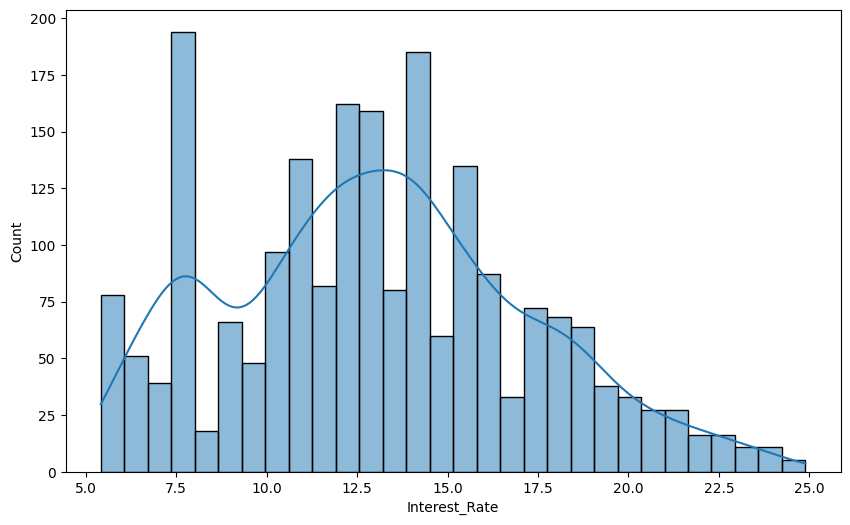

In [29]:
# Check the distribution of target  
plt.figure(figsize=(10, 6))
sns.histplot(data['Interest_Rate'], kde = True, bins=30)
plt.show()

### CheckPoint-1 (dealing with dtype = 'object')

In [30]:
data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10+ years
2196,4200.0,4200.00,14.33,60.0,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2 years
2197,19800.0,19775.00,15.31,60.0,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6 years
2198,18000.0,18000.00,20.99,60.0,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4 years


In [31]:
data = data.rename(columns = {'Loan_Length' : 'Loan_Length_by_month'})

In [32]:
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Purpose - 14 distinct values
State - 44 distinct values
Home_Ownership - 3 distinct values
FICO_Range - 38 distinct values
Employment_Length - 11 distinct values


In [33]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

Loan_Purpose ['debt_consolidation' 'major_purchase' 'credit_card' 'home_improvement'
 'other' 'car' 'moving' 'small_business' 'house' 'educational' 'vacation'
 'wedding' 'medical' 'renewable_energy']
State ['VA' 'NY' 'LA' 'NV' 'OH' 'CA' 'IL' 'NJ' 'WA' 'NC' 'CT' 'AK' 'MA' 'TX'
 'VT' 'OK' 'FL' 'NH' 'GA' 'MN' 'MD' 'WY' 'PA' 'AL' 'AZ' 'SC' 'MI' 'OR'
 'RI' 'NM' 'CO' 'MO' 'WI' 'KY' 'UT' 'AR' 'WV' 'DE' 'MT' 'KS' 'DC' 'SD'
 'HI' 'IN']
Home_Ownership ['MORTGAGE' 'OWN' 'RENT']
FICO_Range ['720-724' '710-714' '690-694' '730-734' '665-669' '735-739' '800-804'
 '680-684' '745-749' '660-664' '670-674' '705-709' '695-699' '715-719'
 '760-764' '685-689' '785-789' '755-759' '675-679' '775-779' '740-744'
 '725-729' '640-644' '790-794' '765-769' '770-774' '700-704' '750-754'
 '810-814' '815-819' '780-784' '820-824' '795-799' '805-809' '645-649'
 '655-659' '830-834' '650-654']
Employment_Length ['5 years' '4 years' '< 1 year' '10+ years' '2 years' '8 years' '1 year'
 '6 years' '7 years' '3 years' '9 years

| West                  | Midwest                   | South                     | Northeast                   |
|-----------------------|---------------------------|---------------------------|-----------------------------|
| California (CA)       | Illinois (IL)             | Texas (TX)                | New York (NY)               |
| Washington (WA)       | Ohio (OH)                 | Florida (FL)              | Pennsylvania (PA)           |
| Arizona (AZ)          | Michigan (MI)             | Georgia (GA)              | New Jersey (NJ)             |
| Nevada (NV)           | Missouri (MO)             | Virginia (VA)             | Massachusetts (MA)         |
| Oregon (OR)           | Minnesota (MN)            | North Carolina (NC)       | Maryland (MD)               |
| Colorado (CO)         | Wisconsin (WI)            | Alabama (AL)              | Connecticut (CT)            |
| Utah (UT)             | Kentucky (KY)             | South Carolina (SC)       | New Hampshire (NH)          |
| Alaska (AK)           | Oklahoma (OK)             | Louisiana (LA)            | Rhode Island (RI)           |
| Hawaii (HI)           | Kansas (KS)               | Mississippi (MS)          | Vermont (VT)                |
| Montana (MT)          | Iowa (IA)                 | Arkansas (AR)             | Delaware (DE)               |
| Idaho (ID)            | Indiana (IN)              | Tennessee (TN)            |                             |
| Wyoming (WY)          | South Dakota (SD)         | Kentucky (KY)             |                             |
| New Mexico (NM)       | North Dakota (ND)         |                           |                             |


In [34]:
data1 = data.copy()

In [35]:
state_regions = {
    'West': ['CA', 'WA', 'AZ', 'NV', 'OR', 'CO', 'UT', 'AK', 'HI', 'MT', 'ID', 'WY', 'NM'],
    'Midwest': ['IL', 'OH', 'MI', 'MO', 'MN', 'WI', 'KY', 'OK', 'KS', 'IA', 'IN', 'SD', 'ND', 'NE'],
    'South': ['TX', 'FL', 'GA', 'VA', 'NC', 'AL', 'SC', 'LA', 'MS', 'AR', 'TN', 'KY'],
    'Northeast': ['NY', 'PA', 'NJ', 'MA', 'MD', 'CT', 'NH', 'RI', 'VT', 'DE'],
    'District of Columbia': ['DC']
}

data1['Region'] = data1['State'].map({state: region for region, states in state_regions.items() for state in states})

In [36]:
data1.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length_by_month               0
Loan_Purpose                       0
Debt_To_Income_Ratio               0
State                              0
Home_Ownership                     0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                  0
Region                            10
dtype: int64

In [37]:
data1.dropna(inplace = True)

In [38]:
data1.drop(columns='State', inplace = True)

In [39]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Region
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,South
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,Northeast
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,South
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,West
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,Midwest


In [40]:
data1['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1098
credit_card            374
other                  158
home_improvement       126
major_purchase          81
small_business          75
car                     43
wedding                 35
moving                  24
medical                 24
house                   19
vacation                17
educational             13
renewable_energy         3
Name: count, dtype: int64

In [41]:
# Dictionary to map loan purposes to groups
loan_purpose_groups = {
    'Debt_Related': ['debt_consolidation', 'credit_card'],
    'Personal_Expenses': ['home_improvement', 'house', 'car', 'wedding', 'medical', 'vacation', 'educational'],
    'Business': ['small_business', 'major_purchase'],
    'Others': ['moving','other']
}

data1['Grouped_Loan_Purpose'] = data1['Loan_Purpose'].apply(lambda purpose: next((group for group, purposes in loan_purpose_groups.items() if purpose in purposes), 'Other'))

In [42]:
data1.drop('Loan_Purpose', axis=1, inplace=True)

In [43]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Region,Grouped_Loan_Purpose
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,South,Debt_Related
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,Northeast,Debt_Related
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,South,Business
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,West,Debt_Related
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,Midwest,Debt_Related


In [44]:
bucket_ranges = [(300, 579), (580, 669), (670, 739), (740, 799), (800, 850)]
bucket_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
def map_fico_to_bucket(score):
    for i, (lower, upper) in enumerate(bucket_ranges):
        if lower <= score <= upper:
            return bucket_labels[i]
    return 'Unknown'

In [45]:
data1['FICO_Score'] = data1['FICO_Range'].apply(lambda x: map_fico_to_bucket(sum(map(int, x.split('-'))) / 2))

In [46]:
data1.drop('FICO_Range', axis=1, inplace=True)

In [47]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        num_distinct_values = len(data1[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Home_Ownership - 3 distinct values
Employment_Length - 11 distinct values
Region - 5 distinct values
Grouped_Loan_Purpose - 5 distinct values
FICO_Score - 4 distinct values


In [48]:
data1['Employment_Length'].value_counts()

Employment_Length
10+ years    568
< 1 year     223
2 years      212
3 years      200
5 years      177
4 years      159
1 year       156
6 years      131
7 years      105
8 years       94
9 years       65
Name: count, dtype: int64

In [49]:
employment_length_groups = {
    'Junior': ['< 1 year'],
    'Mid-Level': ['1 year', '2 years', '3 years', '4 years'],
    'Mid-Senior': ['5 years', '6 years', '7 years'],
    'Senior': ['8 years', '9 years', '10+ years']
}

def map_to_group(length):
    for group, lengths in employment_length_groups.items():
        if any(substring in length for substring in lengths):
            return group
    return 'Unknown'

In [50]:
data1['Employment_Group'] = data1['Employment_Length'].apply(map_to_group)

In [51]:
data1.drop('Employment_Length', axis=1, inplace=True)

In [52]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2090 non-null   float64
 1   Amount_Funded_By_Investors      2090 non-null   float64
 2   Interest_Rate                   2090 non-null   float64
 3   Loan_Length_by_month            2090 non-null   float64
 4   Debt_To_Income_Ratio            2090 non-null   float64
 5   Home_Ownership                  2090 non-null   object 
 6   Monthly_Income                  2090 non-null   float64
 7   Open_CREDIT_Lines               2090 non-null   float64
 8   Revolving_CREDIT_Balance        2090 non-null   float64
 9   Inquiries_in_the_Last_6_Months  2090 non-null   float64
 10  Region                          2090 non-null   object 
 11  Grouped_Loan_Purpose            2090 non-null   object 
 12  FICO_Score                      2090 no

In [54]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        num_distinct_values = len(data1[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Home_Ownership - 3 distinct values
Region - 5 distinct values
Grouped_Loan_Purpose - 5 distinct values
FICO_Score - 4 distinct values
Employment_Group - 4 distinct values


In [55]:
data1.duplicated().value_counts()

False    2090
Name: count, dtype: int64

In [56]:
data1.shape

(2090, 14)

In [57]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [58]:
data1.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,12628.444976,12195.099569,13.073282,41.293780,15.370474,5780.352105,10.095215,15404.505263,0.899043
std,7806.542574,7743.037698,4.153958,9.953593,7.468398,4128.650396,4.481655,18789.671337,1.224393
min,1000.000000,0.000000,5.420000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,6500.000000,6000.000000,10.160000,36.000000,9.742500,3500.000000,7.000000,5640.000000,0.000000
50%,10500.000000,10000.000000,13.110000,36.000000,15.205000,5000.000000,9.000000,11072.000000,0.000000
75%,17387.500000,16468.750000,15.800000,36.000000,20.657500,6925.265000,13.000000,18958.500000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,270800.000000,9.000000


#### All looks good, let's visualize the data again

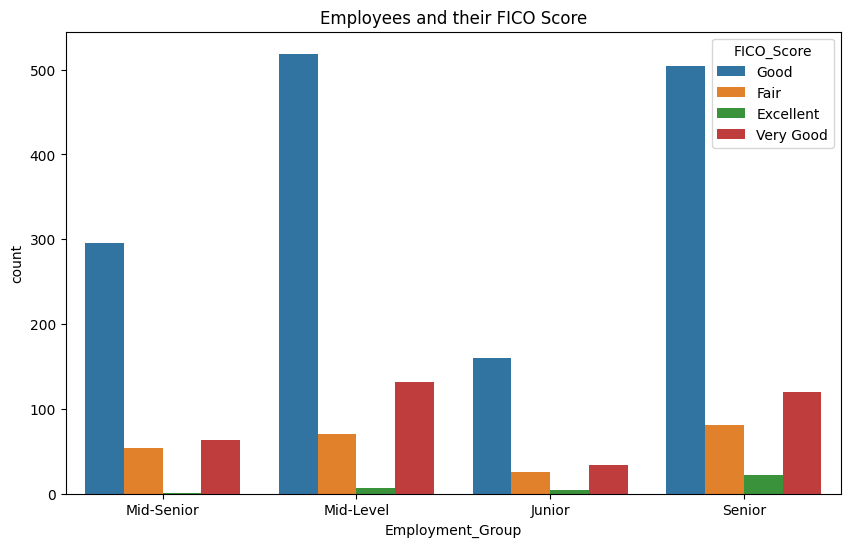

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Employment_Group', data = data1, hue='FICO_Score')
plt.title("Employees and their FICO Score")
plt.show()

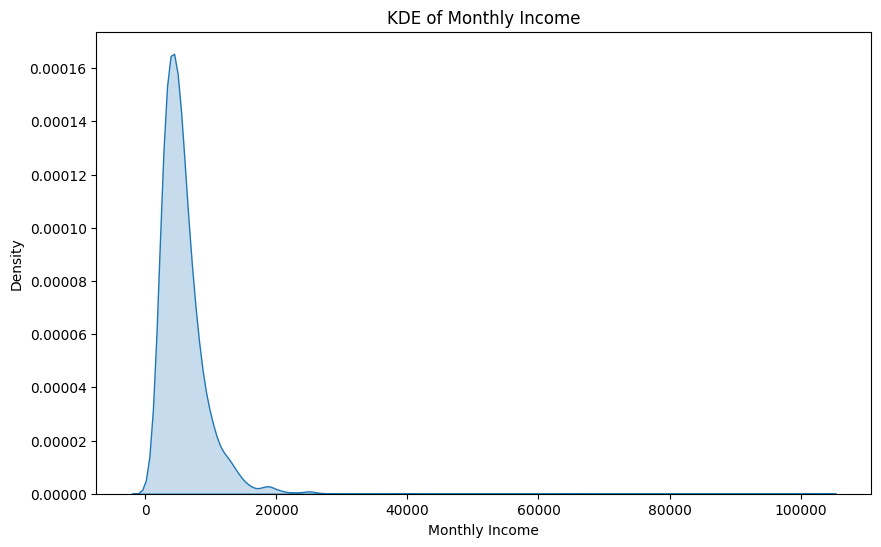

In [60]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data1['Monthly_Income'], fill=True)
plt.title('KDE of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()

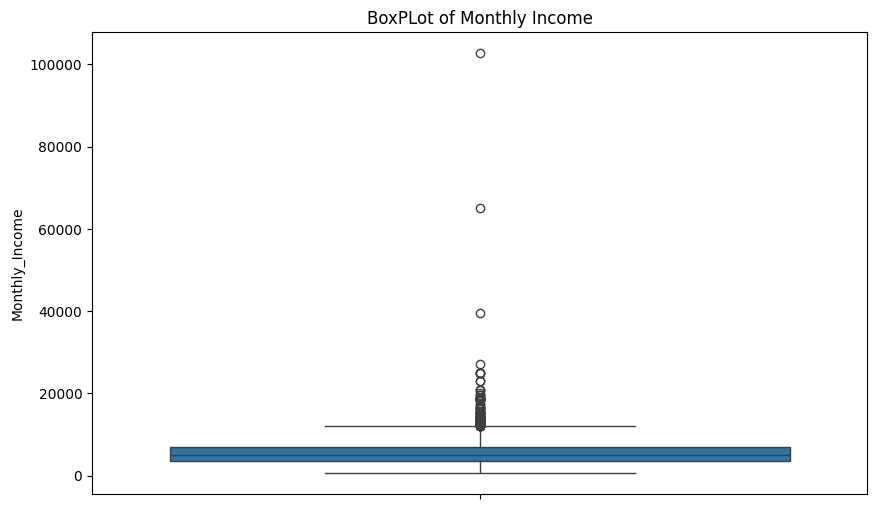

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data1['Monthly_Income'])
plt.title('BoxPLot of Monthly Income')
plt.show()

In [62]:
data1[data1['Monthly_Income'] >= 30000]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
516,4500.0,4500.0,6.91,36.0,0.58,MORTGAGE,65000.00,7.0,3015.0,4.0,Northeast,Business,Good,Mid-Senior
803,35000.0,35000.0,16.29,36.0,17.17,MORTGAGE,39583.33,14.0,55965.0,2.0,Northeast,Debt_Related,Good,Senior
1621,33000.0,33000.0,7.62,36.0,0.26,MORTGAGE,102750.00,7.0,95435.0,0.0,Northeast,Debt_Related,Excellent,Senior


### Scaling

In [63]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [64]:
objects = []
for cols in data1:
    if data1[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Home_Ownership', 'Region', 'Grouped_Loan_Purpose', 'FICO_Score', 'Employment_Group']


In [65]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['Home_Ownership', 'Region', 'Grouped_Loan_Purpose', 'FICO_Score', 
                     'Employment_Group', 'Loan_Length_by_month']
ordinal_encoder = OrdinalEncoder()
data1[columns_to_encode] = ordinal_encoder.fit_transform(data1[columns_to_encode])

In [66]:
data1[columns_to_encode] = data1[columns_to_encode].astype('int64')

In [67]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,1,27.56,0,8606.56,11.0,15210.0,3.0,3,1,2,2
1,19750.0,19750.00,17.27,1,13.39,0,6737.50,14.0,19070.0,3.0,2,1,2,1
2,2100.0,2100.00,14.33,0,3.50,1,1000.00,13.0,893.0,1.0,3,0,2,0
3,28000.0,28000.00,16.29,0,19.62,0,7083.33,12.0,38194.0,1.0,4,1,2,3
4,24250.0,17431.82,12.23,1,23.79,0,5833.33,6.0,31061.0,2.0,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,1,12.10,0,7083.33,16.0,17969.0,1.0,1,3,2,3
2196,4200.0,4200.00,14.33,1,14.16,2,3850.00,4.0,5718.0,0.0,2,4,2,1
2197,19800.0,19775.00,15.31,1,15.03,0,6666.67,10.0,46879.0,3.0,1,1,2,2
2198,18000.0,18000.00,20.99,1,11.63,2,9051.83,5.0,32394.0,2.0,4,1,2,1


In [68]:
cols_to_round = ['Amount_Requested', 'Amount_Funded_By_Investors',
                 'Loan_Length_by_month', 'Open_CREDIT_Lines', 
                 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months']
data1[cols_to_round] = data1[cols_to_round].applymap(lambda x: round(x)).astype('int64')

#### Check their Linearity
Before proceeding to scaling, lets check relationship between the independent and dependent variables

In [69]:
data1.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length_by_month', 'Debt_To_Income_Ratio', 'Home_Ownership',
       'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Region', 'Grouped_Loan_Purpose',
       'FICO_Score', 'Employment_Group'],
      dtype='object')

In [70]:
columns = ['Amount_Requested', 'Amount_Funded_By_Investors',
       'Loan_Length_by_month', 'Debt_To_Income_Ratio', 'Home_Ownership',
       'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Region', 'Grouped_Loan_Purpose',
       'FICO_Score', 'Employment_Group']

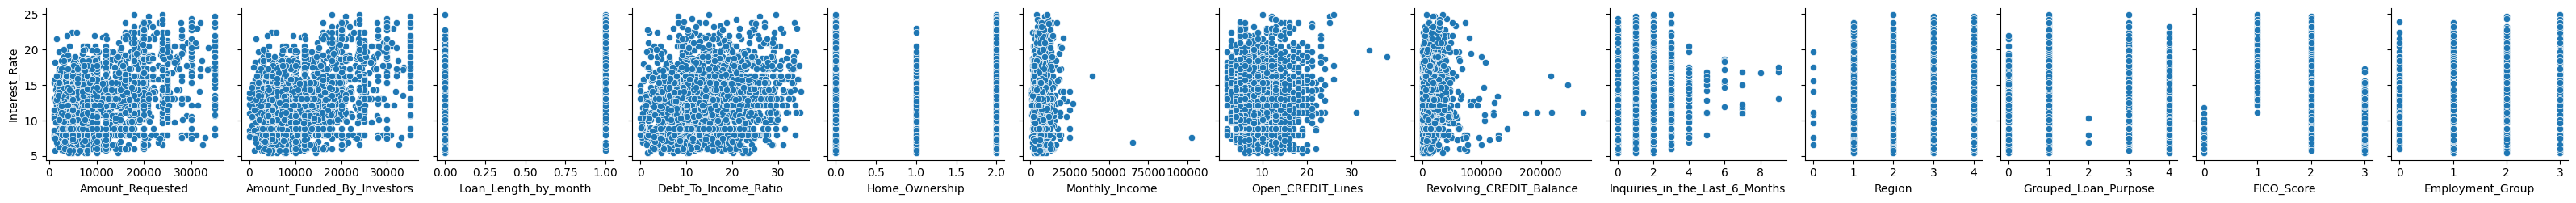

In [71]:
rs = sns.pairplot(data1, x_vars=columns, y_vars='Interest_Rate')
plt.show()
# Double tap this shit (the graph, so that it will zoom in)

In [72]:
high_cardinality_columns = [col for col in data1.columns if data1[col].nunique() > 10]
print("Columns with Cardinality > 10:", high_cardinality_columns)

Columns with Cardinality > 10: ['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']


In [73]:
data1.Open_CREDIT_Lines.unique()

array([11, 14, 13, 12,  6,  5, 10,  8,  4, 15, 17,  7, 18,  9,  2, 20, 16,
        3, 19, 23, 24, 21, 26, 22, 31, 25, 34, 38], dtype=int64)

In [74]:
test_cols = ['Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']

In [75]:
data1[test_cols] = np.log1p(data1[test_cols])

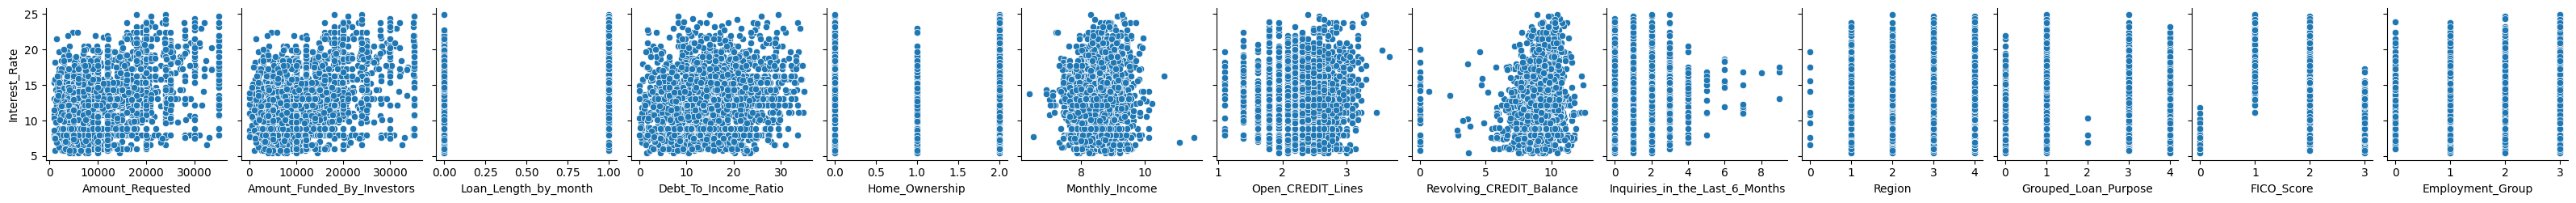

In [76]:
rs = sns.pairplot(data1, x_vars=columns, y_vars='Interest_Rate')
plt.show()

In [77]:
floats1 = []
for cols in data1:
    if data1[cols].dtypes == 'float64':
        floats1.append(cols)
        
print(floats1)

['Interest_Rate', 'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']


In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
floats = ['Debt_To_Income_Ratio', 'Monthly_Income']
scaler = StandardScaler()
data1[floats] = scaler.fit_transform(data1[floats])

In [79]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000,25000,18.49,1,1.632538,0,1.045351,2.484907,9.629774,3,3,1,2,2
1,19750,19750,17.27,1,-0.265244,0,0.573945,2.708050,9.855924,3,2,1,2,1
2,2100,2100,14.33,0,-1.589807,1,-3.097956,2.639057,6.795706,1,3,0,2,0
3,28000,28000,16.29,0,0.569137,0,0.670320,2.564949,10.550460,1,4,1,2,3
4,24250,17432,12.23,1,1.127624,0,0.296502,1.945910,10.343740,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000,30000,23.28,1,-0.438013,0,0.670320,2.833213,9.796459,1,1,3,2,3
2196,4200,4200,14.33,1,-0.162118,2,-0.503464,1.609438,8.651549,0,2,4,2,1
2197,19800,19775,15.31,1,-0.045599,0,0.553597,2.397895,10.755346,3,1,1,2,2
2198,18000,18000,20.99,1,-0.500960,2,1.142474,1.791759,10.385759,2,4,1,2,1


In [80]:
data1.skew()

Amount_Requested                  0.877786
Amount_Funded_By_Investors        0.894034
Interest_Rate                     0.279004
Loan_Length_by_month              1.348788
Debt_To_Income_Ratio              0.156459
Home_Ownership                    0.012415
Monthly_Income                    0.237394
Open_CREDIT_Lines                -0.290209
Revolving_CREDIT_Balance         -3.262553
Inquiries_in_the_Last_6_Months    1.986460
Region                           -0.240082
Grouped_Loan_Purpose              1.269277
FICO_Score                       -0.481631
Employment_Group                 -0.138265
dtype: float64

In [81]:
corr = data1.corr()

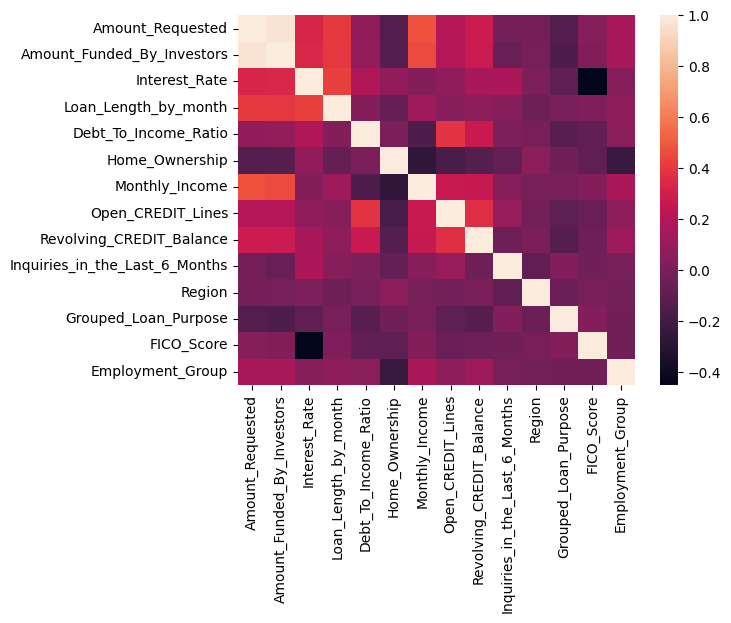

In [82]:
sns.heatmap(corr)
plt.show()

In [83]:
ir_correlation = corr['Interest_Rate']
sorted_corr = ir_correlation.abs().sort_values(ascending=False)
print("Top correlated variables with 'Interest Rate':")
print(f"{round(sorted_corr,4)*100}")

Top correlated variables with 'Interest Rate':
Interest_Rate                     100.00
FICO_Score                         44.97
Loan_Length_by_month               42.67
Amount_Funded_By_Investors         33.39
Amount_Requested                   32.99
Debt_To_Income_Ratio               18.27
Inquiries_in_the_Last_6_Months     17.04
Revolving_CREDIT_Balance           15.19
Grouped_Loan_Purpose                9.02
Home_Ownership                      8.14
Open_CREDIT_Lines                   7.14
Employment_Group                    4.16
Monthly_Income                      3.72
Region                              1.38
Name: Interest_Rate, dtype: float64


In [84]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000,25000,18.49,1,1.632538,0,1.045351,2.484907,9.629774,3,3,1,2,2
1,19750,19750,17.27,1,-0.265244,0,0.573945,2.708050,9.855924,3,2,1,2,1
2,2100,2100,14.33,0,-1.589807,1,-3.097956,2.639057,6.795706,1,3,0,2,0
3,28000,28000,16.29,0,0.569137,0,0.670320,2.564949,10.550460,1,4,1,2,3
4,24250,17432,12.23,1,1.127624,0,0.296502,1.945910,10.343740,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000,30000,23.28,1,-0.438013,0,0.670320,2.833213,9.796459,1,1,3,2,3
2196,4200,4200,14.33,1,-0.162118,2,-0.503464,1.609438,8.651549,0,2,4,2,1
2197,19800,19775,15.31,1,-0.045599,0,0.553597,2.397895,10.755346,3,1,1,2,2
2198,18000,18000,20.99,1,-0.500960,2,1.142474,1.791759,10.385759,2,4,1,2,1


In [85]:
scale_cols = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Revolving_CREDIT_Balance', 'Open_CREDIT_Lines']
data1[scale_cols] = scaler.fit_transform(data1[scale_cols])

In [86]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,1.585147,1.654127,18.49,1,1.632538,0,1.045351,0.388005,0.372761,3,3,1,2,2
1,0.912473,0.975936,17.27,1,-0.265244,0,0.573945,0.926975,0.520725,3,2,1,2,1
2,-1.348992,-1.304077,14.33,0,-1.589807,1,-3.097956,0.760333,-1.481489,1,3,0,2,0
3,1.969532,2.041664,16.29,0,0.569137,0,0.670320,0.581336,0.975140,1,4,1,2,3
4,1.489051,0.676499,12.23,1,1.127624,0,0.296502,-0.913860,0.839889,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2.225788,2.300023,23.28,1,-0.438013,0,0.670320,1.229287,0.481818,1,1,3,2,3
2196,-1.079923,-1.032801,14.33,1,-0.162118,2,-0.503464,-1.726559,-0.267264,0,2,4,2,1
2197,0.918879,0.979165,15.31,1,-0.045599,0,0.553597,0.177842,1.109191,3,1,1,2,2
2198,0.688248,0.749872,20.99,1,-0.500960,2,1.142474,-1.286188,0.867381,2,4,1,2,1


In [87]:
data2 = data1.copy()

### TTS, Model Selection and Prediction

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = data1.drop(columns='Interest_Rate')
y = data1.Interest_Rate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [89]:
from statsmodels.stats import diagnostic
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:          Interest_Rate   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              1416.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:00:06   Log-Likelihood:                         -6046.7
No. Observations:                2090   AIC:                                  1.212e+04
Df Residuals:                    2077   BIC:                                  1.219e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [90]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    print(f"{model_name} RMSE: {mean_rmse}")

Linear Regression RMSE: 3.0050644237667665
Random Forest RMSE: 2.6405893244555325
Gradient Boosting RMSE: 2.5277309659758336
SVR RMSE: 2.8826786382806087
Lasso RMSE: 3.979106027879351
Ridge RMSE: 3.0049769470580108
Decision Tree RMSE: 3.490049451838554
K-Nearest Neighbors RMSE: 3.5053949050181843


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 2.3814408699719176
Mean Squared Error (MSE): 9.004820986894863
Root Mean Squared Error (RMSE): 3.0008033902431634
R-squared (R2): 0.512515017797934


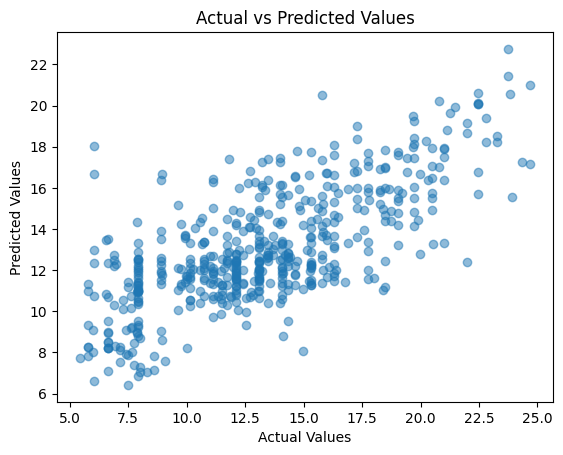

In [93]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [94]:
res = pd.DataFrame({'actual': y_test, 'predicted': np.round(y_pred, 2)})

In [95]:
res

,actual,predicted
926,7.68,8.04
342,13.11,11.49
102,7.88,8.95
1785,11.89,10.70
443,10.00,11.71
...,...,...
2164,6.03,18.03
1063,7.90,12.41
1688,23.76,22.75
1600,7.90,11.79


### Cool!! Not Yet though

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [97]:
pd.DataFrame({'Variable': X_train.columns, 'VIF': vif})

,Variable,VIF
0,Amount_Requested,14.029386
1,Amount_Funded_By_Investors,13.724122
2,Loan_Length_by_month,1.529524
3,Debt_To_Income_Ratio,1.400030
4,Home_Ownership,2.162945
5,Monthly_Income,1.632745
6,Open_CREDIT_Lines,1.466039
7,Revolving_CREDIT_Balance,1.303787
8,Inquiries_in_the_Last_6_Months,1.553921
9,Region,6.198416


In [98]:
data2.drop('Amount_Funded_By_Investors', axis=1, inplace=True)
data2.drop('Region', axis=1, inplace=True)

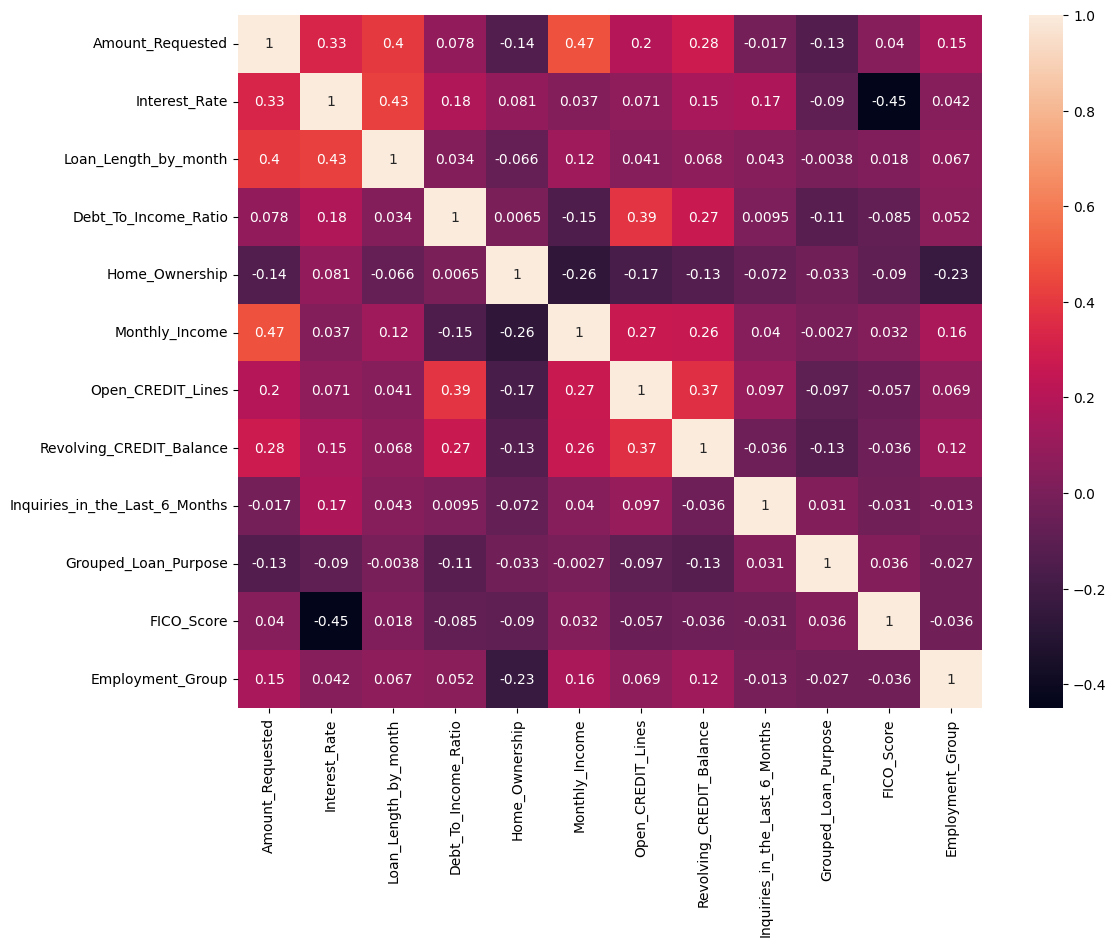

In [99]:
corr = data2.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)
plt.show()

In [100]:
X = data2.drop(columns='Interest_Rate')
y = data2.Interest_Rate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [101]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [102]:
def calculate_mape(actual_values, forecasted_values):
    if len(actual_values) != len(forecasted_values):
        raise ValueError("Lengths of actual and forecasted values must be the same.")
    n = len(actual_values)
    absolute_percentage_errors = [abs((actual - forecast) / actual) * 100 for actual, forecast in zip(actual_values, forecasted_values)]
    mape = sum(absolute_percentage_errors) / n
    return mape

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = calculate_mape(y_test, y_pred)
 
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 2.0686189297936477
Mean Squared Error (MSE): 6.876131324636144
Root Mean Squared Error (RMSE): 2.6222378466943352
R-squared (R2): 0.6070220569082123
Mean Absolute Percentage Error (MAPE): 17.40%


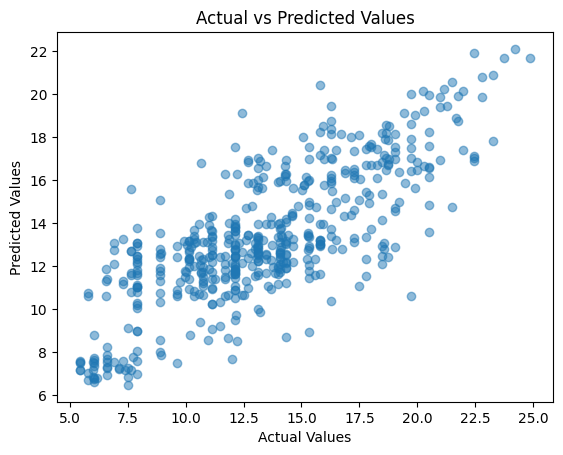

In [104]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [105]:
res = pd.DataFrame({'actual': y_test, 'predicted': np.round(y_pred, 2)})
res

,actual,predicted
930,17.14,18.01
1807,14.65,12.93
1541,18.64,18.57
1320,8.90,10.75
350,20.50,16.61
...,...,...
26,24.89,21.69
884,11.14,11.71
1838,10.16,11.40
430,13.35,16.14


#### Residual Plot

In [106]:
resd = y_test - y_pred

In [107]:
print(round(np.mean(resd), 4))
print(round(np.mean(resd)))

0.0351
0


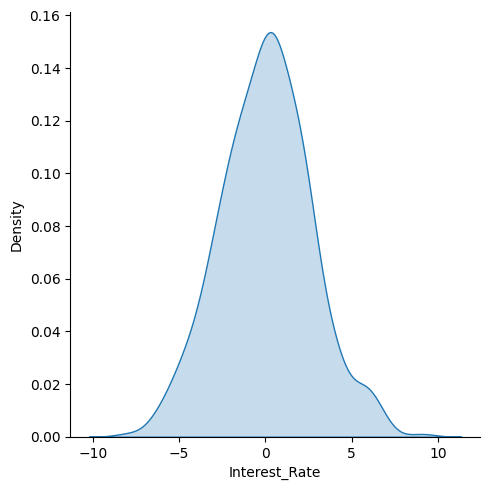

In [108]:
# the variance seems normally distributed
sns.displot(resd, kind = 'kde', fill = True)
plt.show()

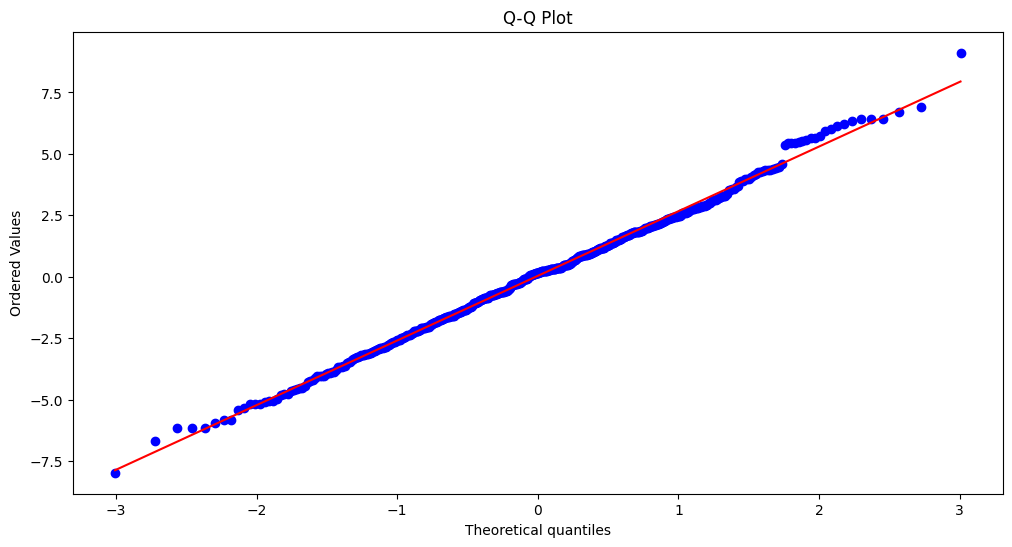

In [109]:
import scipy.stats as stats
import pylab
# Check for normality of residuals using a Q-Q plot
plt.figure(figsize=(12, 6))
stats.probplot(resd, dist="norm", plot=pylab)
pylab.title("Q-Q Plot")
pylab.show()
# It seems our errors are normally distributed

#### Homoscedasticity and Heteroscedasticity
The spread of residuals should be equal, if it's not equal, then we call it Heteroscedasticity.
We want the residuals to be randomly scattered around the red line, showing no clear patterns or trends, which indicates that the model's assumptions (homoscedasticity and normality) are met.

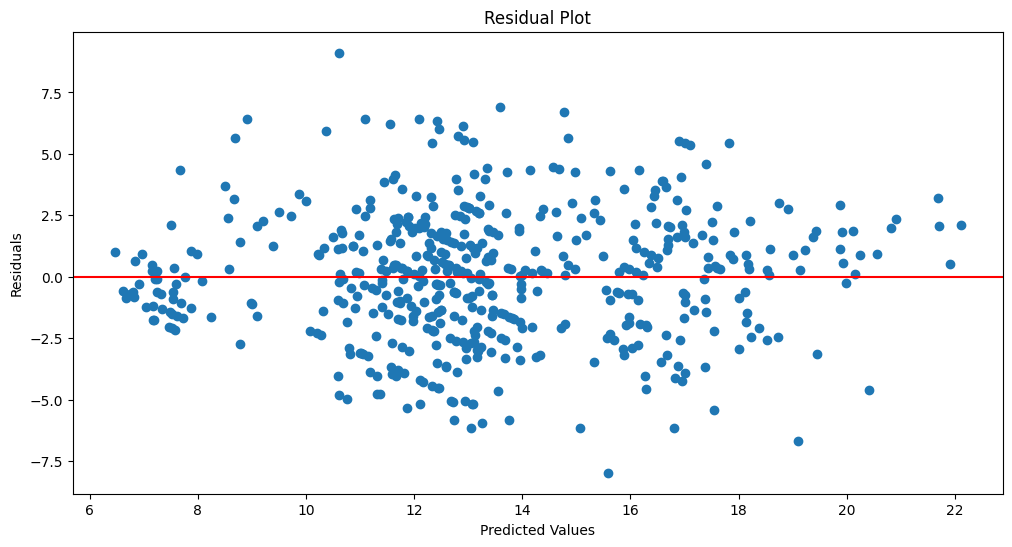

In [110]:
plt.figure(figsize=(12,6))
plt.scatter(y_pred, resd)
# Setting the red line at y=0
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
# Our spread seems uniform, lets say, Homoscedasticity holds the assumption

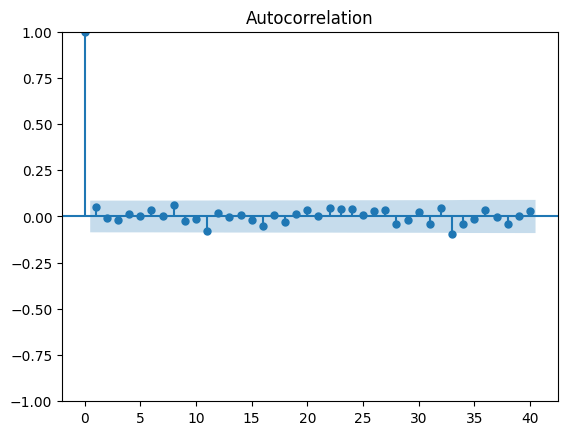

In [111]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resd, lags=40)
plt.show()

In [112]:
X_train

,Amount_Requested,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Grouped_Loan_Purpose,FICO_Score,Employment_Group
920,-0.080522,0,0.452618,0,1.839461,1.959401,0.558290,0,1,2,2
847,-1.127971,0,-1.560343,2,-0.780875,-2.265528,-0.341315,0,0,3,2
124,1.457018,0,1.826736,0,0.780373,0.581336,0.355061,1,1,2,0
71,-0.977420,0,-1.354091,0,-1.399909,-1.286188,-1.092137,0,1,1,2
1905,0.021981,0,-0.705872,0,-0.000282,-0.052366,0.881190,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
1675,0.124484,0,-0.593371,2,1.334284,1.082858,0.483963,0,1,2,3
978,0.124484,0,0.669584,2,-0.597390,0.926975,0.565185,0,1,2,1
1638,-0.336778,0,-0.933553,2,-0.203127,-0.306848,-0.015348,1,1,2,1
312,-0.336778,1,0.060205,2,-0.829612,-1.286188,0.179458,1,1,3,2


In [113]:
print(len(X_train['Amount_Requested']), len(y_pred))

1567 523


In [114]:
train_predictions = model.predict(X_train)
train_residuals = y_train - train_predictions

data3 = pd.DataFrame({'Fitted Values': train_predictions, 'Residuals': train_residuals})
data3

,Fitted Values,Residuals
920,10.561932,-4.531932
847,9.138180,-1.238180
124,14.498944,-2.378944
71,14.873343,1.116657
1905,11.526664,0.593336
...,...,...
1675,11.875443,-2.975443
978,12.021535,1.088465
1638,13.221984,-1.511984
312,11.448884,-0.308884


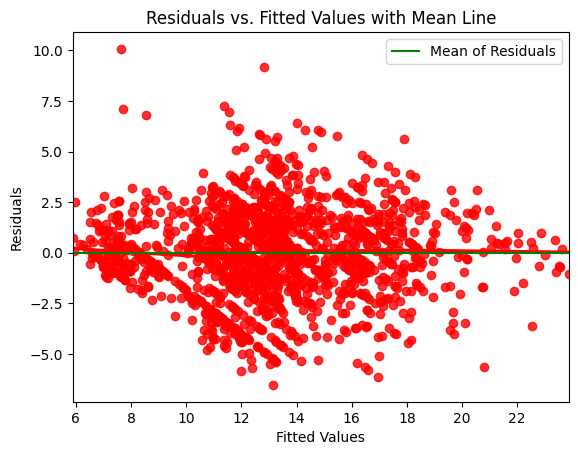

In [115]:
sns.residplot(x='Fitted Values', y='Residuals', data=data3, color='red', lowess=True)
residual_mean = train_residuals.mean()
# Plotting the residuals vs. fitted values with the mean line
plt.axhline(y=residual_mean, color='green', linestyle='-', label='Mean of Residuals')
plt.title('Residuals vs. Fitted Values with Mean Line')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()